In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["font.family"] = 'Malgun Gothic'

# [2차 프로그래밍 문제]
* 제출날짜: 2024-05-16까지 ipynb 소스자료 업로드하기
* cyber캠퍼스와 깃허브에 올리기
* 실습에서 사용한 weather.csv 파일을 판다스를 이용하여 데이터프레임을 만들어 다음과 같이 처리한다.

In [100]:
# 데이터 셋 불러오기
weather = pd.read_csv("weather.csv", index_col = 0, parse_dates=True) # csv -> DataFrame

# 데이터 정제
mean_wind = weather['최대 풍속'].mean()
weather['최대 풍속'].fillna(mean_wind, inplace=True)
mean_wind = weather['평균 풍속'].mean()
weather['평균 풍속'].fillna(mean_wind, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_11040\4244684873.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  weather['최대 풍속'].fillna(mean_wind, inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_11040\4244684873.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

## 1) 이 데이터셋의 앞 3개 행과 마지막 3개의 행을 화면에 출력하시오.

In [101]:
print(weather.head(3))
print(weather.tail(3))

            평균 기온  최대 풍속  평균 풍속
일시                             
2010-08-01   28.7    8.3    3.4
2010-08-02   25.2    8.7    3.8
2010-08-03   22.1    6.3    2.9
            평균 기온  최대 풍속  평균 풍속
일시                             
2020-07-29   21.6    3.2    1.0
2020-07-30   22.9    9.7    2.4
2020-07-31   25.7    4.8    2.5


## 2) 2015년 6월 6일의 "평균 기온"과 "풍속 정보"를 출력하시오

In [102]:
print(weather.loc['2015-06-06'])

평균 기온    16.6
최대 풍속     4.4
평균 풍속     1.9
Name: 2015-06-06 00:00:00, dtype: float64


## 3) 가장 무더웠던 날짜를 추출해서 이 날의 기상 데이터를 출력하시오.

In [103]:
index = weather['평균 기온'].idxmax()
print(weather.loc[index])

평균 기온    31.3
최대 풍속     7.8
평균 풍속     4.6
Name: 2013-08-08 00:00:00, dtype: float64


## 4) "평균 기온"이 30도를 넘는 날짜들을 찾아, 이 날의 기상 데이터를 출력하시오.

In [104]:
date = weather[weather['평균 기온'] >= 30]
print(date)

            평균 기온  최대 풍속  평균 풍속
일시                             
2013-08-08   31.3    7.8    4.6
2013-08-09   30.6    9.9    6.4
2013-08-10   30.6    7.4    3.8
2018-07-23   30.5    6.5    1.6
2018-08-04   30.3    5.8    3.0


## 5) 연도별 "평균 기온"의 평균에 대한 추이를 선 그래프로 그리시오.

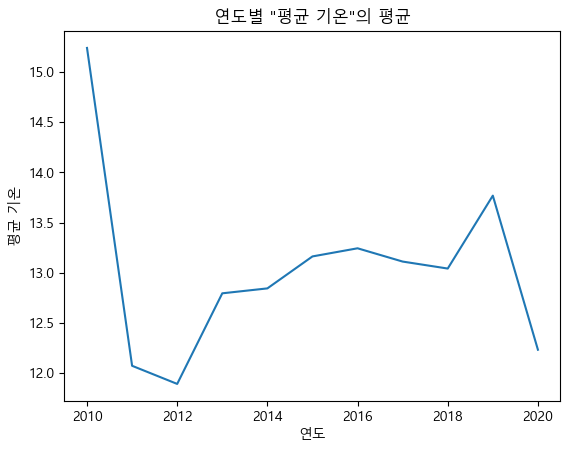

In [105]:
weather['year'] = weather.index.year # 'year' 컬럼 추가
yearly_temp = weather.groupby('year')['평균 기온'].mean()
yearly_temp.plot(kind='line') # 선 그래프

plt.xlabel('연도')
plt.ylabel('평균 기온')
plt.title('연도별 "평균 기온"의 평균')
plt.show()

## 6) 연도별 "최대 풍속"의 평균을 막대 그래프로 그리시오.

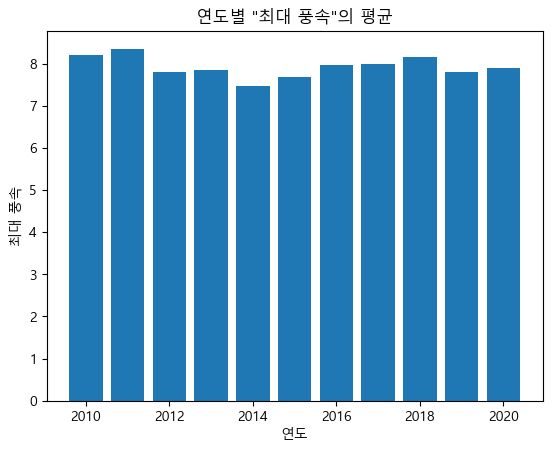

In [106]:
yearly_temp = weather.groupby('year')['최대 풍속'].mean()
years = np.arange(2010, 2021)
plt.bar(years, yearly_temp) # 막대 그래프

plt.title('연도별 "최대 풍속"의 평균')
plt.xlabel('연도')
plt.ylabel('최대 풍속')
plt.show()

## 7) 연도별 "평균 풍속"의 합을 히스토그램 그래프로 그리시오

Text(0, 0.5, '빈도수')

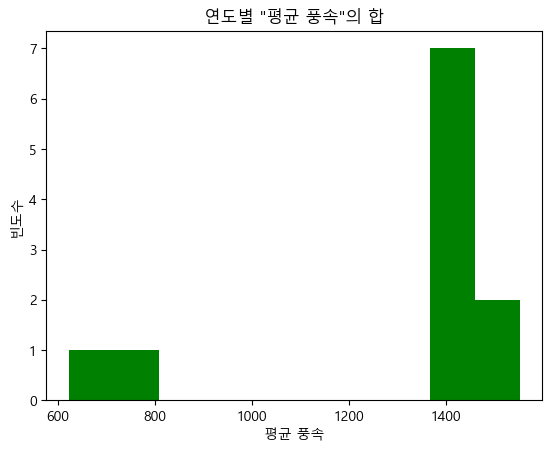

In [112]:
yearly_sums = weather.groupby('year')[['평균 기온', '최대 풍속', '평균 풍속']].sum()
plt.hist(yearly_sums['평균 풍속'], bins=10, color='green')

plt.title('연도별 "평균 풍속"의 합')
plt.xlabel("평균 풍속")
plt.ylabel("빈도수")

## 8) 2015년과 2016년의 "평균 기온"의 평균을 비교하여 어느 해가 더 더웠는지 출력하시오.

In [113]:
yearly_mean = weather.groupby('year')['평균 기온'].mean()
mean_2015 = yearly_mean.loc[2015] # 2015년의 평균
mean_2016 = yearly_mean.loc[2016] # 2016년의 평균

if mean_2015 > mean_2016:
    print("2015년이 2016년보다 더 더웠습니다.")
else:
    print("2016년이 2015년보다 더 더웠습니다.")

2016년이 2015년보다 더 더웠습니다.


## 9) 월별 "평균 기온" 의 합이 가장 적은 달과 가장 많은 달을 출력하시오.

In [121]:
weather['month'] = weather.index.month # 'month' 컬럼 추가
monthly_sums = weather.groupby('month')['평균 기온'].sum()

print('<월별 "평균 기온"의 합>')
print('가장 적은 달 :', monthly_sums.idxmin())
print('가장 많은 달 :', monthly_sums.idxmax())

<월별 "평균 기온"의 합>
가장 적은 달 : 1
가장 많은 달 : 8


## 10) 연도별 "최대 풍속"의 평균이 가장 큰 연도를 출력하시오.

In [123]:
yearly_mean = weather.groupby('year')['최대 풍속'].mean()
print('연도별 "최대 풍속"의 평균이 가장 큰 연도 :', yearly_mean.idxmax())

연도별 "최대 풍속"의 평균이 가장 큰 연도 : 2011
